<b> The analysis calculates performance of a single stock and portfolio of stocks.<p>Tools used include <i>Pandas, Matplotlib, Numpy,</i> and historical market data from [Stooq](https://stooq.com/).

In [1]:
# load dependencies
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

# Measuring Return
<p> Measuring the return of investment is one of the two characterisitics most important to financial investment. This is known at the <i>rate of return</i> and is essential in deciding which securities are best to invest in.
<p>The first calculation below shows how to get the simple rate of return for a <i>single security</i>.
<p>The second calculation shows how to find the simple rate of return for a <i>portfolio of securities</i>. 

### Getting the Simple Rate of Return for a Single Security

In [2]:
# set data source as Stooq
source = 'stooq'

In [3]:
# select stock and timeframe
symbol = 'KO'
date_start = dt.datetime(1995, 1, 1)
date_end = dt.datetime(2015, 1, 1)

In [4]:
# get data using "pandas-datareader" package
stooq_df = web.DataReader(symbol, data_source=source, start=date_start, end=date_end)

In [5]:
# check data
stooq_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-12-31,33.1975,33.2122,32.6582,32.6582,1.211243e+07
2014-12-30,33.0605,33.2523,32.9910,33.0761,1.192239e+07
2014-12-29,33.1211,33.3061,32.8667,33.1525,1.124041e+07
2014-12-26,33.2367,33.4960,33.2033,33.2278,8.360492e+06
2014-12-24,33.3355,33.4373,33.1975,33.2122,8.281666e+06


In [6]:
# calculate simple returns data for the selected stock
stooq_df['Simple_Return'] = pd.DataFrame((stooq_df['Close']/stooq_df['Close'].shift(1)) - 1)
stooq_df['Simple_Return'].head()

Date
2014-12-31         NaN
2014-12-30    0.012796
2014-12-29    0.002310
2014-12-26    0.002271
2014-12-24   -0.000469
Name: Simple_Return, dtype: float64

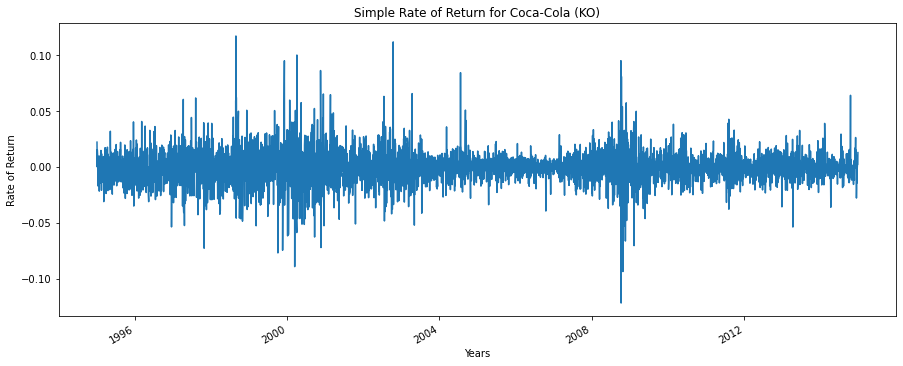

In [7]:
# plot simple returns data
stooq_df['Simple_Return'].plot(figsize=(15 , 6))
# style line chart
plt.title('Simple Rate of Return for Coca-Cola (' + symbol + ')')
plt.xlabel('Years')
plt.ylabel('Rate of Return')
plt.show()

In [8]:
# calculate the mean simple return
avg_simple_return = stooq_df['Simple_Return'].mean() * 250

print(f'Stock Ticker: {symbol} | Mean Simple RoR: {str(round(avg_simple_return, 5) * 100)} %')

Stock Ticker: KO | Mean Simple RoR: -3.737 %


##### Simple Rate of Return for Single Stock - Analysis

The simple rate of return for Coca-Cola between the years 1995 and 2014 is <i>-3.737%<i>.

### Getting the Simple Rate of Return for a Portfolio of Securities

In [9]:
# select stocks and timeframe
tickers = ['KO', 'PG', 'GE', 'WMT', 'T']
portfolio_df = pd.DataFrame()
for i in tickers:
    portfolio_df[i] = web.DataReader(i, data_source=source, start=date_start, end=date_end)['Close']

In [10]:
# check dataframe of portfolio
portfolio_df.head()

,KO,PG,GE,WMT,T
Date,,,,,
2014-12-31,32.6582,72.2498,175.333,72.2359,15.7509
2014-12-30,33.0761,73.2907,177.417,73.0007,15.9801
2014-12-29,33.1525,73.4811,178.324,72.8767,15.9939
2014-12-26,33.2278,74.1322,178.871,73.1018,16.0232
2014-12-24,33.2122,73.8787,179.210,72.7001,15.9237


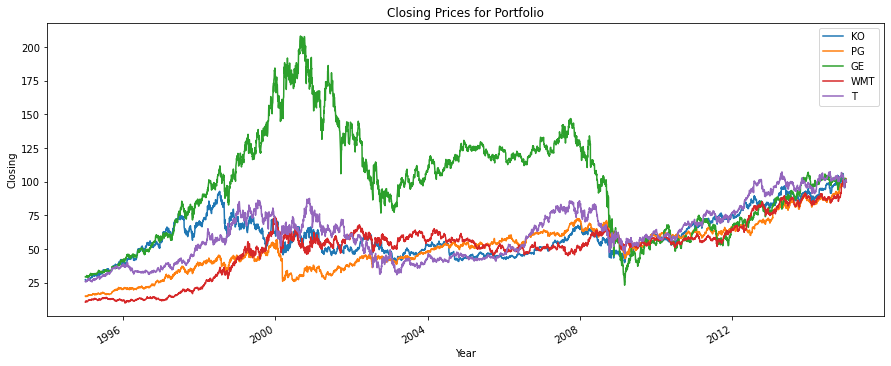

In [11]:
# normalize the historical closing data to 100...
(portfolio_df / portfolio_df.iloc[0] * 100).plot(figsize = (15 , 6))

# then visualize the data
plt.title('Closing Prices for Portfolio')
plt.xlabel('Year')
plt.ylabel('Closing')
plt.show()

In [12]:
# calculate the rate of return for each security
portfolio_simple_return = (portfolio_df/portfolio_df.shift(1)) - 1
portfolio_simple_return.head()

,KO,PG,GE,WMT,T
Date,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN
2014-12-30,0.012796,0.014407,0.011886,0.010588,0.014552
2014-12-29,0.002310,0.002598,0.005112,-0.001699,0.000864
2014-12-26,0.002271,0.008861,0.003067,0.003089,0.001832
2014-12-24,-0.000469,-0.003420,0.001895,-0.005495,-0.006210


In [13]:
# assign weights for each stock respective to postion in "tickers" list
weights = np.array([0.1, 0.1, 0.1, 0.4, 0.3])

In [14]:
# calculate overall portfolio return
annual_returns = portfolio_simple_return.mean() * 250
portfolio_return = np.dot(annual_returns, weights)

print(f'Portfolio: {tickers} | Mean Simple RoR: {str(round(portfolio_return, 5) * 100)} %')

Portfolio: ['KO', 'PG', 'GE', 'WMT', 'T'] | Mean Simple RoR: -4.979 %


##### Simple Rate of Return for Portfolio - Analysis

<p>The simple rate of return for the given portfolio between the years 1995 and 2014 is <i>-4.979%</i>.

<p>The portfolio is comprised of Coca-Cola (10%), Proctor & Gamble (10%), General Electric (10%), Wal-Mart (40%), and AT&T (30%).

# Measuring Risk

<p> Measuring risk is the second most important characteristic for financial investment. Knowing the risk of securities provides a better understanding for the quality of the rate of return for securities as well as it's performance in a portfolio. <p><i>The main measure for a single stock's risk is the variance - or dispersion of prices</i> - of historical data for a given security. A security with a higher rate of return BUT with a higher variance of prices can be described as "risky". <p><i>Covariance is a measure of the relationship between stocks within a portfolio.</i> If it is positive, then the stocks generally move together in a similar direction. If it is negative, then the stocks generally move away from each other in an inverse direction.

### Calculating Single Stock Risk

In [15]:
# get data using "pandas-datareader" package
stooq_df = web.DataReader(symbol, data_source=source, start=date_start, end=date_end)

In [16]:
stooq_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-12-31,33.1975,33.2122,32.6582,32.6582,1.211243e+07
2014-12-30,33.0605,33.2523,32.9910,33.0761,1.192239e+07
2014-12-29,33.1211,33.3061,32.8667,33.1525,1.124041e+07
2014-12-26,33.2367,33.4960,33.2033,33.2278,8.360492e+06
2014-12-24,33.3355,33.4373,33.1975,33.2122,8.281666e+06


In [17]:
# calculate the simple rate of returns
stooq_df['Simple_Return'] = pd.DataFrame((stooq_df['Close']/stooq_df['Close'].shift(1)) - 1)
stooq_df['Simple_Return'].head()

Date
2014-12-31         NaN
2014-12-30    0.012796
2014-12-29    0.002310
2014-12-26    0.002271
2014-12-24   -0.000469
Name: Simple_Return, dtype: float64

In [18]:
# calculate the variance from the derived rate of returns...
security_variance = (np.std(stooq_df['Simple_Return']) ** 2) * 250

# then print results
print(f'Stock: {symbol} | Variance: {str(round(security_variance, 5) * 100)} %')

Stock: KO | Variance: 5.41 %


##### Variance for Single Stock - Analysis

The variance for Coca-Cola between the years 1995 and 2014 is <i>5.75%<i>.

### Calculating Portfolio Risk

In [19]:
# get portfolio returns
portfolio_simple_return

,KO,PG,GE,WMT,T
Date,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN
2014-12-30,0.012796,0.014407,0.011886,0.010588,0.014552
2014-12-29,0.002310,0.002598,0.005112,-0.001699,0.000864
2014-12-26,0.002271,0.008861,0.003067,0.003089,0.001832
2014-12-24,-0.000469,-0.003420,0.001895,-0.005495,-0.006210
...,...,...,...,...,...
1995-01-09,0.009904,-0.012345,-0.007167,0.017351,-0.003325
1995-01-06,0.015293,0.004908,0.009638,0.005786,0.003336
1995-01-05,0.000000,-0.003044,0.004655,-0.005753,0.000000


In [20]:
# assign weights for each security respective to postion in "tickers" list
weights = np.array([0.1, 0.1, 0.1, 0.4, 0.3])

In [21]:
# get portfolio covariance using numpy.dot() method
portfolio_covar = np.dot(weights, np.dot(portfolio_simple_return.cov() * 250, weights))

In [22]:
# print results
print(f'Portfolio: {tickers} | Variance: {str(round(portfolio_covar, 5) * 100)} %')

Portfolio: ['KO', 'PG', 'GE', 'WMT', 'T'] | Variance: 3.768 %


##### Covariance for Portfolio - Analysis

<p>The variance for the given portfolio between the years 1995 and 2015 is <i>3.768%</i>.

<p>The portfolio is comprised of Coca-Cola (10%), Proctor & Gamble (10%), General Electric (10%), Wal-Mart (40%), and AT&T (30%).

# Overall Analysis
<p>Given this analysis, the single stock of Coca-Cola was a consistent but low performing stock. The variance for the closing prices was low (<i>5.75%</i>) meaning very few large price jumps. However, its slightly low simple rate of return (<i>-3.73%</i>) suggest a decrease in its value.

<p>The portfolio is comprised of Coca-Cola (10%), Proctor & Gamble (10%), General Electric (10%), Wal-Mart (40%), and AT&T (30%). Its simple rate of return is underperforming (<i>-4.979%</i>) while its covariance is positive but small (<i> 3.768% </i>). 
<br>
<p>In conclusion, better performance from this portfolio can be obtained through a different mix of stocks (preferably from more diverse industries) and/or a different spread of weights for the portfolio - determined from a positive covariance. And if Coca-Cola remains in this portfolio, then its poor performance must be supplemented with a better stock and/or a change in weight within the portfolio.